In [149]:
# import plotly.express as px 
import matplotlib.pyplot as plt
import json
import utilities
import pandas as pd
import os
import csv
import Levenshtein as lev
from tqdm.notebook import tqdm

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
# Number of snapshots for each URL -- BOTH urls
url_snaps_fp = utilities.read_json("data/existing_fp_full_snapshots.json")
url_snaps_non_fp = utilities.read_json("data/existing_non_fp_full_snapshots.json")

num_snaps_df = pd.DataFrame(columns=['url_id', 'num_snapshots'])
num_snapshots_report = {}

for url_id, value in url_snaps_fp.items():
    num_snapshots_report[str(url_id)+"_fp"] = len(value['snapshots'])
print(len(num_snapshots_report))    
for url_id, value in url_snaps_non_fp.items():
    num_snapshots_report[str(url_id)+"_non-fp"] = len(value['snapshots'])

snapshots_report_df = pd.DataFrame.from_dict(set(num_snapshots_report.items()))
snapshots_report_df.columns = ['url_id', 'num_snapshots']

1174


# Snapshots over year

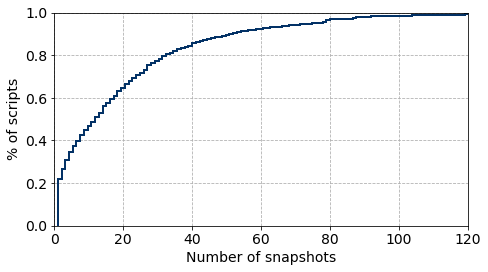

In [150]:

x = snapshots_report_df['num_snapshots']

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n_bins = 120
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step', cumulative=True, color = '#033266', linewidth=2)

#ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
#ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        #label='Reversed emp.')

#tidy up the figure
ax.grid(True)
#ax.legend(loc='right')
#ax.set_title('Cumulative step histograms')
ax.set_xlabel('Number of snapshots')
ax.set_ylabel('% of scripts')
plt.xlim([0, 120])
plt.ylim([0, 1])
plt.grid(True, linestyle='--')
fig.set_size_inches(7, 4, forward=True)
plt.tight_layout()
plt.savefig("num_snapshots.pdf")
plt.show()

# Scripts over year

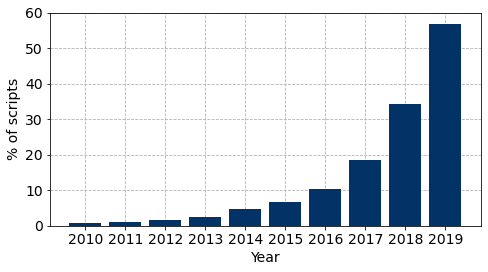

In [181]:
# Number of unique Scripts annualy

annualy_script_numbers = utilities.read_json("data/annualy_script_numbers.json")
normalized_annualy_script_numbers = utilities.read_json("data/normalized_annualy_script_numbers.json")                                             

years = annualy_script_numbers.keys()
num_scripts = normalized_annualy_script_numbers.values()

fig, ax = plt.subplots(sharey=True, tight_layout=True)

plt.grid(True, linestyle='--')
ax.set_axisbelow(True)

# plot barchart of annual number of scripts
ax.bar(years,num_scripts,color = '#033266')

ax.set_xlabel('Year')
ax.set_ylabel('% of scripts')
# ax.spines["top"].set_visible(False)        
# ax.spines["right"].set_visible(False)   
fig.set_size_inches(7, 4, forward=True)
# plt.rc('axes', labelsize=20) 
plt.ylim([0, 60])

fig.savefig('numscriptsAnuually.pdf')
plt.show()

# APIs usage over years

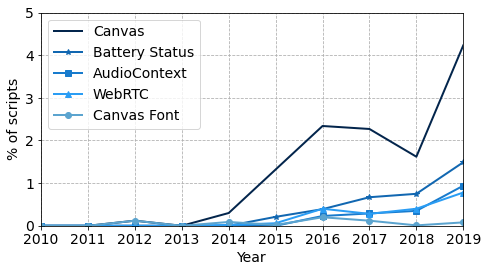

In [178]:
Canvas_dict = utilities.read_json("data/Canvas_dict.json")
Canvas_font = utilities.read_json("data/Canvas_font.json")
WebRTC = utilities.read_json("data/WebRTC.json")
AudioContext = utilities.read_json("data/AudioContext.json")
BatteryStatus = utilities.read_json("data/BatteryStatus.json")

years = annualy_script_numbers.keys()
fig, ax = plt.subplots(sharey=True, tight_layout=True)
# Overlay API FP Technique
ax.plot(years, Canvas_dict.values(), label='Canvas',  color = '#03254c',linewidth=2 )
ax.plot(years, BatteryStatus.values(), label='Battery Status', linestyle='-',  marker='*' , color = '#1167b1',linewidth=2)
ax.plot(years, AudioContext.values(), label='AudioContext', linestyle='-',  marker='s', color = '#187bcd',linewidth=2 )
ax.plot(years, WebRTC.values(), label='WebRTC',  linestyle='-', marker='^',  color = '#2a9df4',linewidth=2 )
ax.plot(years, Canvas_font.values(), label='Canvas Font', linestyle='-', marker='o',  color = '#5ba4cf',linewidth=2 )



ax.set_xlabel('Year')
ax.set_ylabel('% of scripts')

# tidy up the figure
# ax.spines["top"].set_visible(False)        
# ax.spines["right"].set_visible(False)  
fig.set_size_inches(7, 4, forward=True)
plt.grid(True, linestyle='--')
plt.ylim([0, 5])
plt.xlim(['2010', '2019'])
ax.legend(loc='upper left')
fig.savefig('fp-keywords-frequency.pdf')
plt.show()

# FP Prevalence over years

In [3]:
fingerprinting_domains = utilities.read_json('data/fingerprinting_domains.json')

In [80]:
def get_url_domain_map(fingerprinting_domains):
    url_to_top_domain_map = {}
    for key in fingerprinting_domains:
        for item in fingerprinting_domains[key]:
            script_url = item['script_url']
            top_url = item['top_url']

            if script_url.startswith('http://'):
                script_url = script_url[7:]
            elif script_url.startswith('https://'):
                script_url = script_url[8:]

            if '#' in script_url:
                script_url = script_url.split('#')[0]
                
            if '/JS/LsJS.aspx?siteid=DDT27257741' in script_url or \
                '/JS/LsJS.aspx?siteid=PET67880904' in script_url or \
                '/JS/LsJS.aspx?siteid=PUT57756570' in script_url or \
                '/JS/LsJS.aspx?siteid=LRW58656020' in script_url or \
                '/JS/LsJS.aspx?siteid=DRT30895435' in script_url or \
                '/JS/LsJS.aspx?siteid=LWT26616761' in script_url or \
                '/JS/LsJS.aspx?siteid=DDT94811403' in script_url or \
                '/JS/LsJS.aspx?siteid=PUT33990604' in script_url or \
                '/JS/LsJS.aspx?siteid=DET73576274' in script_url:
                
                script_url = script_url.replace('/JS/LsJS.aspx?siteid=','/js/lsjs.aspx?siteid=')
                

            if script_url not in url_to_top_domain_map:
                url_to_top_domain_map[script_url] = set()

            url_to_top_domain_map[script_url].add(top_url)
    return url_to_top_domain_map


def get_all_url_domain_map(fingerprinting_domains):
    url_to_top_domain_map = {}
    for key in fingerprinting_domains:

        script_url = fingerprinting_domains[key]['script_url']
        top_url = fingerprinting_domains[key]['top_domain']

        if script_url.startswith('http://'):
            script_url = script_url[7:]
        elif script_url.startswith('https://'):
            script_url = script_url[8:]

        if '#' in script_url:
            script_url = script_url.split('#')[0]

        if '/JS/LsJS.aspx?siteid=DDT27257741' in script_url or \
            '/JS/LsJS.aspx?siteid=PET67880904' in script_url or \
            '/JS/LsJS.aspx?siteid=PUT57756570' in script_url or \
            '/JS/LsJS.aspx?siteid=LRW58656020' in script_url or \
            '/JS/LsJS.aspx?siteid=DRT30895435' in script_url or \
            '/JS/LsJS.aspx?siteid=LWT26616761' in script_url or \
            '/JS/LsJS.aspx?siteid=DDT94811403' in script_url or \
            '/JS/LsJS.aspx?siteid=PUT33990604' in script_url or \
            '/JS/LsJS.aspx?siteid=DET73576274' in script_url:

            script_url = script_url.replace('/JS/LsJS.aspx?siteid=','/js/lsjs.aspx?siteid=')


        if script_url not in url_to_top_domain_map:
            url_to_top_domain_map[script_url] = set()

        url_to_top_domain_map[script_url].add(top_url)
    return url_to_top_domain_map

In [60]:
url_to_top_domain_map = get_url_domain_map(fingerprinting_domains)

In [64]:
def get_year_url_map(year_url_map, url_snaps):
    for key in url_snaps:
        for year in url_snaps[key]['year']:
            if year not in year_url_map:
                year_url_map[year] = set()
            
            origin = url_snaps[key]['origin']
            if origin.startswith('http://'):
                origin = origin[7:]
            elif origin.startswith('https://'):
                origin = origin[8:]
                
            if ':80' in origin:
                origin = origin.replace(':80', '')
            
            if 'origin-001.ccf4ab51771cacd46d.com//webStaticBlue/header/6.0.17/header.js' == origin:
                origin = 'origin-001.ccf4ab51771cacd46d.com/webStaticBlue/header/6.0.17/header.js'
            if 'origin.bkfon-resource.ru//webStaticRed/header/6.0.21/header.js' == origin:
                origin = 'origin.bkfon-resource.ru/webStaticRed/header/6.0.21/header.js'
                
            if 'cdn.ayc0zsm69431gfebd.xyz/prod/GateHouse/t8y9347t.min.js?' == origin or \
            '506-ct.c3tag.com/c3metrics-506.js?' == origin or \
            'g2insights-cdn.azureedge.net/prod/review-journal/mg2-data-extension.min.js?' == origin:
                origin = origin[:-1]
            
            year_url_map[year].add(origin)
            
    return year_url_map

In [65]:
year_url_map_fp = {}
year_url_map_all = {}
year_url_map_fp = get_year_url_map(year_url_map_fp, url_snaps_fp)
year_url_map_all = get_year_url_map(year_url_map_all, url_snaps_fp)
year_url_map_all = get_year_url_map(year_url_map_all, url_snaps_non_fp)

In [68]:
year_top_domain_map_fp = {}
for year in year_url_map_fp:
    for script_url in year_url_map_fp[year]:
        if year not in year_top_domain_map_fp:
            year_top_domain_map_fp[year] = set()
        year_top_domain_map_fp[year] |= url_to_top_domain_map[script_url]      

In [83]:
# year_top_domain_map_fp

In [85]:
all_script_url_top_url_map_raw = utilities.read_json('data/topDomain_map_script_URL.json')

In [86]:
all_script_url_top_url_map = get_all_url_domain_map(all_script_url_top_url_map_raw) 

In [114]:
def get_closet_match(url, url_list):
    min_distance = 1000
    url_to_return = ''
    for item in url_list:
        if abs(len(item) - len(url)) > 5:
            continue
        lev_distance = lev.distance(url, item)
        if lev_distance < min_distance:
            min_distance = lev_distance
            url_to_return = item
            
    if min_distance < 5:       
        return url_to_return
    else:
        return ''

In [106]:
# year_top_domain_map_all = {}
# for year in year_url_map_all:
#     for script_url in year_url_map_all[year]:
#         if year not in year_top_domain_map_all:
#             year_top_domain_map_all[year] = set()
#         year_top_domain_map_all[year] |= all_script_url_top_url_map[script_url]   

In [116]:
not_found = set()
year_top_domain_map_all = {}

pbar = tqdm(total=len(year_url_map_all), position=0, leave=True)
    
for year in year_url_map_all:
    pbar.update(1)
    for script_url in year_url_map_all[year]:
        if script_url not in all_script_url_top_url_map:
            if script_url in not_found:
                continue
                
            closest_url = get_closet_match(script_url, all_script_url_top_url_map.keys())
            
            if closest_url == '':
                not_found.add(script_url)
                continue
            else:
                script_url = closest_url
                
        if year not in year_top_domain_map_all:
            year_top_domain_map_all[year] = set()
        year_top_domain_map_all[year] |= all_script_url_top_url_map[script_url]   

  0%|          | 0/11 [00:00<?, ?it/s]

In [117]:
len(not_found)

1034

In [133]:
for year in range(2010, 2021, 1):
    print(str(year), round((len(year_top_domain_map_fp[str(year)])/len(year_top_domain_map_all[str(year)])) * 100, 2))

2010 16.87
2011 11.77
2012 13.23
2013 32.18
2014 24.69
2015 23.19
2016 21.44
2017 25.37
2018 34.21
2019 51.23
2020 36.29


In [147]:
for year in range(2010, 2021, 1):
#     print(str(year), len(year_url_map_fp[str(year)]), len(year_url_map_all[str(year)]))
    print(str(year), round((len(year_url_map_fp[str(year)])/len(year_url_map_all[str(year)])) * 100, 2))

2010 0.99
2011 0.9
2012 1.38
2013 1.19
2014 1.27
2015 1.19
2016 1.28
2017 1.37
2018 1.58
2019 1.81
2020 1.73


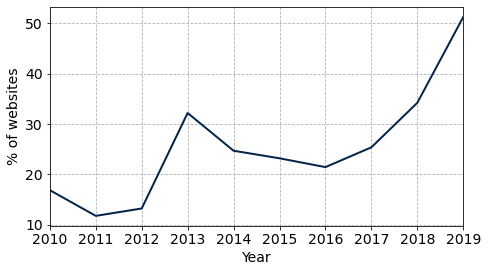

In [179]:
prevalence_dict = {'2010': 16.87,
'2011': 11.77,
'2012': 13.23,
'2013': 32.18,
'2014': 24.69,
'2015': 23.19,
'2016': 21.44,
'2017': 25.37,
'2018': 34.21,
'2019': 51.23
}


years = prevalence_dict.keys()
fig, ax = plt.subplots(sharey=True, tight_layout=True)

ax.plot(years, prevalence_dict.values(),color = '#03254c', linewidth=2 )


ax.set_xlabel('Year')
ax.set_ylabel('% of websites')


fig.set_size_inches(7, 4, forward=True)
plt.grid(True, linestyle='--')
# plt.ylim([0, 5])
# plt.xticks(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.xlim(['2010','2019'])
# plt.ylim([min(prevalence_dict.values()), max(prevalence_dict.values())])

# ax.legend(loc='upper left')
fig.savefig('fp-prevalence.pdf')
plt.show()

In [159]:
prevalence_dict.values()

dict_values([16.87, 11.77, 13.23, 32.18, 24.69, 23.19, 21.44, 25.37, 34.21, 51.23])